# Initial load of program

### Imports

In [15]:
import numpy as np
import pandas as pd
import regex as re
import networkx as nx
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper
import warnings

warnings.filterwarnings('ignore')

### Temporal graph

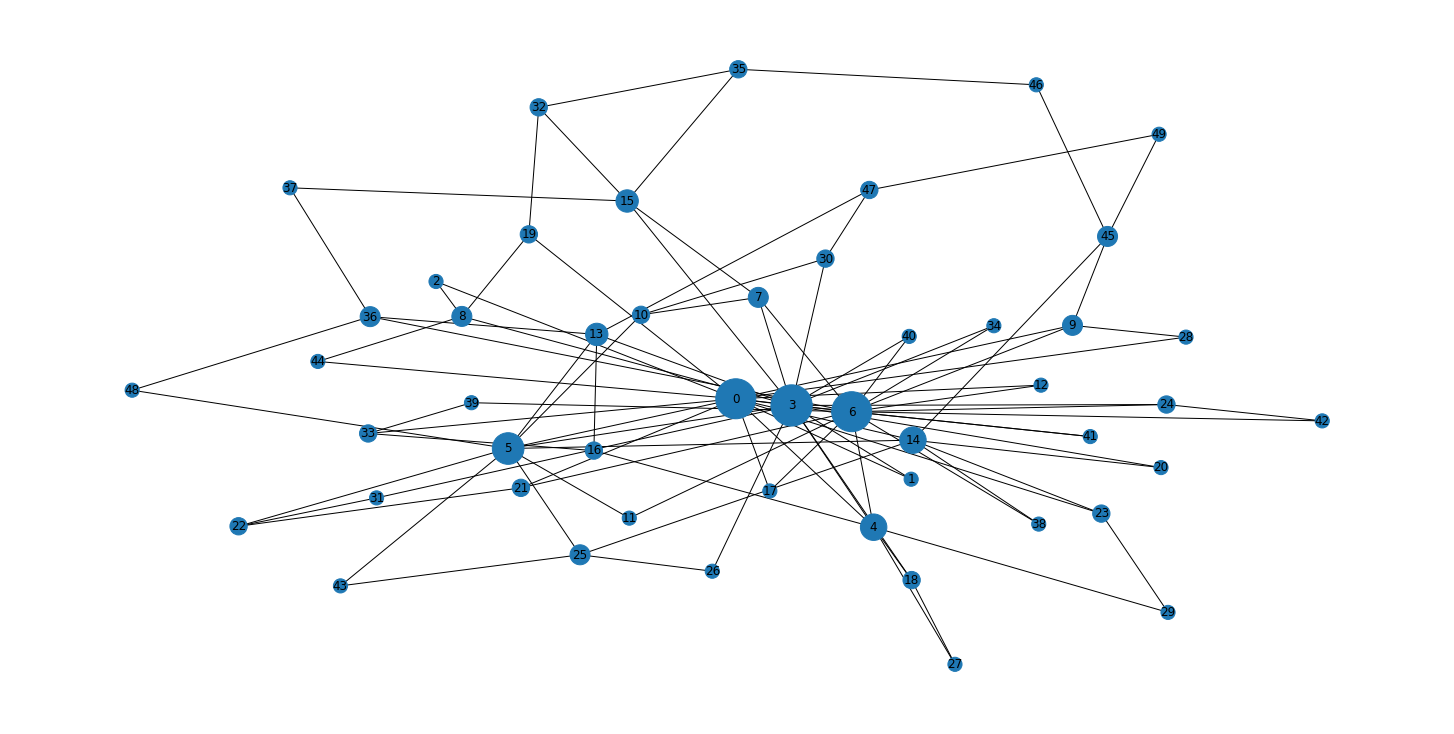

In [46]:
temp_graph = nx.barabasi_albert_graph(50, 2)
plt.figure(figsize=(20,10))
nx.draw(temp_graph, with_labels=True, node_size=[v * 100 for v in dict(temp_graph.degree()).values()])

### Determining merge candidates

In [37]:
def merge_candidates(graph: dict):
    graph_degree_sorted = {k: v for k, v in sorted(graph.items(), key=lambda item: item[1], reverse=True)}
    print(graph_degree_sorted)
    neighbors_4 = [n for n in temp_graph.neighbors(4)]
    neighbors_1 = [n for n in temp_graph.neighbors(1)]
    return sum(n in neighbors_4 for n in neighbors_1)

In [48]:
merge_candidates(dict(temp_graph.degree()))

{3: 17, 0: 16, 6: 16, 5: 10, 4: 7, 14: 7, 13: 5, 15: 5, 7: 4, 8: 4, 9: 4, 25: 4, 36: 4, 45: 4, 10: 3, 16: 3, 18: 3, 19: 3, 21: 3, 22: 3, 23: 3, 24: 3, 30: 3, 32: 3, 33: 3, 35: 3, 47: 3, 1: 2, 2: 2, 11: 2, 12: 2, 17: 2, 20: 2, 26: 2, 27: 2, 28: 2, 29: 2, 31: 2, 34: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 46: 2, 48: 2, 49: 2}


2

In [36]:
def build_graph(node: str):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(f""" 
                CONSTRUCT {{ 
                    {node} ?p ?o .
                    ?o ?p1 ?s . }}
                WHERE {{ 
                    {node} ?p ?o .
                    ?o ?p1 ?s .
                FILTER(regex(str(?o), "entity/Q"))
                FILTER(regex(str(?s), "entity/Q")) }}
                """)
    query_result = sparql.queryAndConvert()  # Produces an RDFlib Graph object 
    query_df = pd.DataFrame(query_result, columns=["Subject", "Property", "Value"])
    query_df["Subject"] = query_df["Subject"].str.replace("http://www.wikidata.org/entity/", "")
    query_df["Property"] = query_df["Property"].str.replace("http://www.wikidata.org/prop/direct/", "")
    query_df["Value"] = query_df["Value"].str.replace("http://www.wikidata.org/entity/", "")
    return query_df
    
build_graph("wd:Q171076")

,Subject,Property,Value
0,Q12705,P1365,Q12748
1,Q12705,P361,Q219416
2,Q555853,P910,Q7416612
3,Q1191614,P186,Q45701
4,Q909363,P279,Q11432
5,Q1191614,P366,Q6484512
6,Q909363,P1424,Q15121293
7,Q12705,P279,Q1138571
8,Q12705,P461,Q2632167
9,Q12705,P1889,Q4202245
